In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from collections import defaultdict
from pathlib import Path
from resulter import load_completion_time


sns.set_style(
    "ticks",
    rc={"axes.grid": True,}
)

RESULTS = Path("results")

In [2]:
data = defaultdict(list)

In [7]:
records = []
for file in RESULTS.glob("*.txt"):
    try:
        time = load_completion_time(file)
    except IndexError:
        print(f"❯ [IndexError] - Skipping '{file}'...")
        continue
    
    try:
        _, _, nodes, model = file.stem.split("_")
        nodes, model = int(nodes), int(model)
    except ValueError:
        original = file.stem
        original = original.replace("nodes_", "_")
        splitted = original.split("_")
        _, _, nodes, model, _ = file.stem.split("_")
        
    records.append({
        "nodes": nodes,
        "model": str(model),
        "time": time,
    })

df = pd.DataFrame.from_records(records)
df.head()

❯ [IndexError] - Skipping 'results/flower_time_128_50_.txt'...
❯ [IndexError] - Skipping 'results/flower_time_1_152_.txt'...
❯ [IndexError] - Skipping 'results/flower_time_128_50.txt'...
❯ [IndexError] - Skipping 'results/flower_time_2_50_.txt'...
❯ [IndexError] - Skipping 'results/flower_time_1_1_.txt'...
❯ [IndexError] - Skipping 'results/flower_time_32_18_.txt'...
❯ [IndexError] - Skipping 'results/flower_time_4_18_.txt'...
❯ [IndexError] - Skipping 'results/flower_time_128_0_.txt'...
❯ [IndexError] - Skipping 'results/flower_time_2nodes_0_.txt'...
❯ [IndexError] - Skipping 'results/flower_time_16_18.txt'...
❯ [IndexError] - Skipping 'results/flower_time_64_0.txt'...
❯ [IndexError] - Skipping 'results/flower_time_32_18.txt'...
❯ [IndexError] - Skipping 'results/flower_time_1_0_.txt'...
❯ [IndexError] - Skipping 'results/flower_time_128_0.txt'...
❯ [IndexError] - Skipping 'results/flower_time_128_152.txt'...
❯ [IndexError] - Skipping 'results/flower_time_2_152.txt'...
❯ [IndexError] 

,nodes,model,time
0,16nodes,0,0.000449
1,8nodes,0,0.002908
2,4nodes,0,0.002985


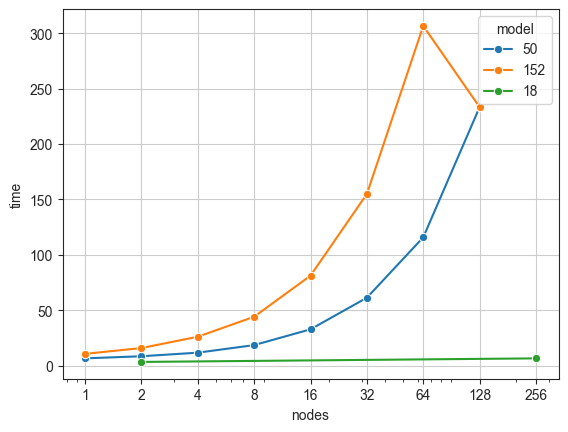

In [ ]:
sns.lineplot(
    df,
    x="nodes",
    y="time",
    hue="model",
    marker="o",
).set(xscale="log")
ticks = [1, 2, 4, 8, 16, 32, 64, 128, 256]
plt.xticks(ticks, ticks)
plt.savefig("flower_plot.pdf", bbox_inches="tight")
plt.show()